# Example

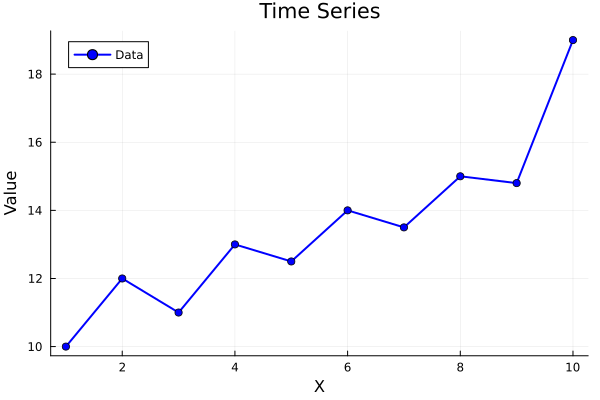

In [184]:
import Plots
using TimeSeriesKit

ts = TimeSeries([10.0, 12.0, 11.0, 13.0, 12.5, 14.0, 13.5, 15.0, 14.8, 19.0])
plot_timeseries(ts)

# Linear Regression

Is fitted? true
X Out of Sample: [6, 7, 8, 9, 10, 11, 12, 13]
Y Out of Sample: [13.500000000000002, 14.100000000000001, 14.700000000000003, 15.300000000000002, 15.900000000000002, 16.500000000000004, 17.1, 17.700000000000003]


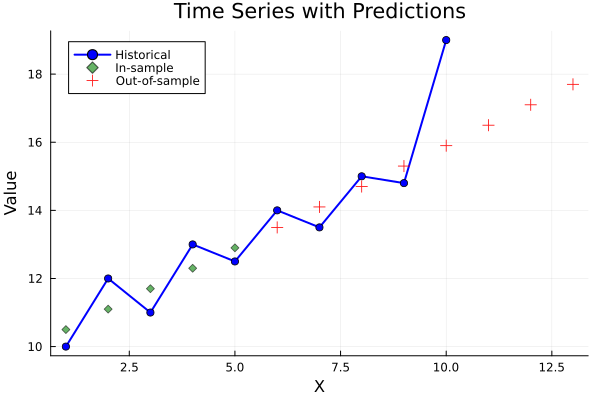

In [185]:
# Split data
train_ts = ts[1:5]
val_x = extrapolate_timestamps(train_ts, length(ts) - length(train_ts) + 3)

# Fit Linear Model
model_linear = LinearModel()
fit(model_linear, train_ts)
println("Is fitted? $(is_fitted(model_linear))")


# Predict ins-ample and out-of-sample
in_sample = predict(model_linear, train_ts.timestamps)
out_of_sample = predict(model_linear, val_x)
println("X Out of Sample: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, in_sample, out_of_sample)

## Iterative training  with sliding_window 3

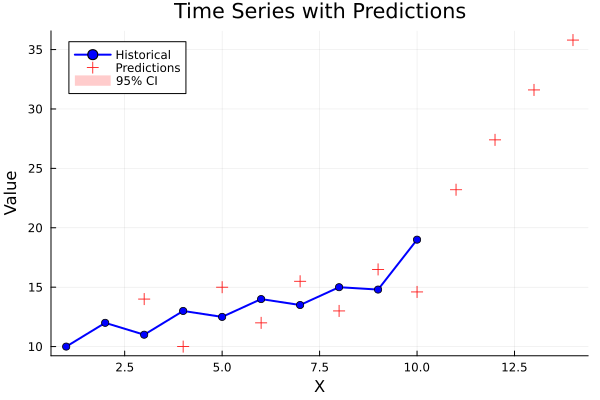

In [186]:

# Fit a linear model
model_linear = LinearModel(sliding_window=2)
fit(model_linear, ts)


# Or predict at specific x values
out_of_sample = iterative_predict(model_linear, ts, 4; return_uncertainty=true)

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, out_of_sample, confidence_level=0.95)

# Linear Regression with Prediction Uncertainty

Dict{Symbol, Any}(:intercept => 3.5814938023520466, :slope => 0.002980843235063638, :intercept_variance => 0.27283441498780886, :slope_variance => 0.00031780362840746524, :covariance => -0.008103992524390362, :residual_variance => 3.3091302807927314)

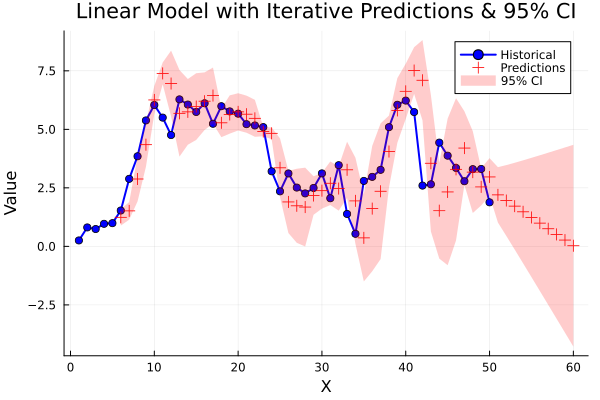

In [187]:
# Import packages (Distributions before TimeSeriesKit to avoid conflicts)
import Plots
import Distributions
using TimeSeriesKit
import Random

Random.seed!(1434)
ts = RandomWalk(50)
# set a seed for reproducibility

# Fit linear model
model = LinearModel(sliding_window=5)
fit(model, ts)
print(model.state.parameters)

predictions = iterative_predict(model, ts, 10, return_uncertainty=true)

plot_timeseries(ts, predictions, confidence_level=0.95, title="Linear Model with Iterative Predictions & 95% CI")

# (Bayesian) Autoregressive Model 

RMSE: 1.051175687461314


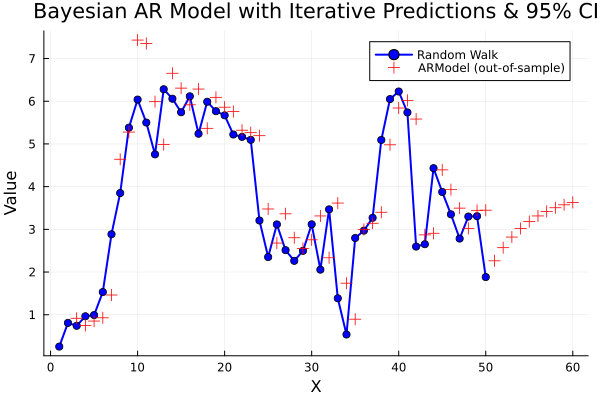

In [188]:
ar = ARModel(p=1)
fit(ar, ts)

predictions_bayesian = iterative_predict(ar, ts, 10, return_uncertainty=false, use_predictions=true)
println("RMSE: $(rmse(ts, predictions_bayesian))")
plot_timeseries(ts, predictions_bayesian, confidence_level=0.95, title="Bayesian AR Model with Iterative Predictions & 95% CI")

Parameters of bar: `Dict{Symbol, Any}(:posterior_precision => [49.001 180.993042972111; 180.993042972111 824.2562650548247], :intercept => 0.741539292859324, :b_post => 22.69776476647971, :intercept_variance => 0.10432376767557196, :a_post => 24.501, :coefficient_variances => [0.006201916996688746], :posterior_covariance => [0.10432376767557196 -0.022907773912596716; -0.022907773912596716 0.006201916996688746], :residual_variance => 0.9658212317126808, :coefficients => [0.8082360995716845])`
PredictionResult(TimeSeries{Float64}([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [0.9163003608632475, 0.7625920179820881, 0.8568521360551161, 0.9307507839561153, 1.531379314294782, 4.688133950612753, 5.441232582457544, 7.597196940818283, 7.467024533686394, 6.32582470066069, 5.093

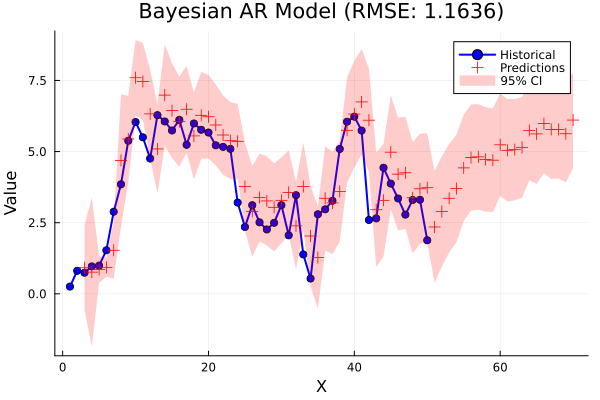

In [202]:
bar = BayesianARModel(p=1)
fit(bar, ts)
println("Parameters of bar: `$(bar.state.parameters)`")
predictions_bayesian = iterative_predict(bar, ts, 20, return_uncertainty=true, use_predictions=true)
println(predictions_bayesian)
metric = rmse(ts, predictions_bayesian.predictions)
plot_timeseries(ts, predictions_bayesian, confidence_level=0.95, title="Bayesian AR Model (RMSE: $(metric = round(rmse(ts, predictions_bayesian.predictions), digits=4)))")

# Simple Exponential Smoothing

Optimized alpha: 0.8


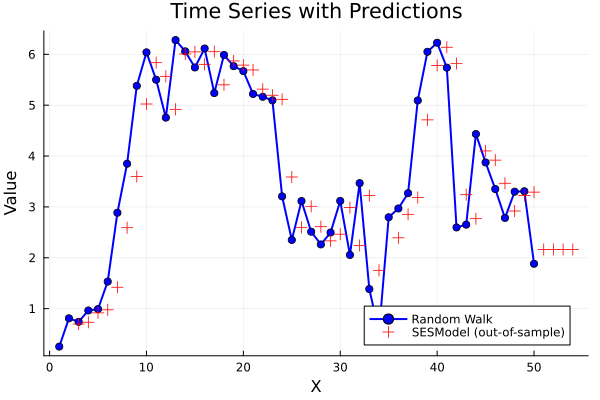

In [190]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ses = SESModel()
fit(model_ses, ts)

println("Optimized alpha: ", model_ses.alpha)

# Forecast
predicted_ses = iterative_predict(model_ses, ts, 4)

# Plot
plot_timeseries(ts, predicted_ses)

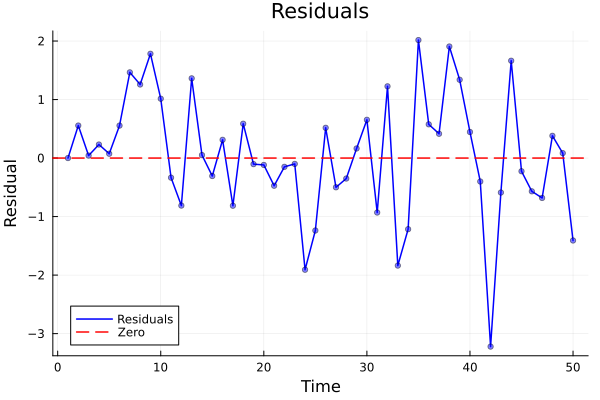

In [191]:
# Plot residuals
plot_residuals(model_ses)

# Auto Regression (AR(1))

# AR(2) On Random Walk

TimeSeries{Float64}([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [-1.2796347256795546, -0.4068319304931006, 0.20720599893162128, 0.5693790668443186, -0.2625650049695454, -0.43726213921597146, -0.5600855071735222, -0.7234048631013554, 0.14703436955352478, -0.35870522852161646, 0.8833026278082776, 0.9180070471495505, 1.5668192283186892, 1.9649060470483908, 2.2285376491864284, 0.947994387246285, 0.9838272340831533, 2.4386475101545786, 3.4121974436636835, 3.492255956522328, 3.7427959588818336, 3.5591978785891607, 4.362149725384133, 4.049601677008264, 4.058495838000954, 1.5246652359105888, 0.7611470353196872, 1.198417357856618, 1.2917729306588328, 

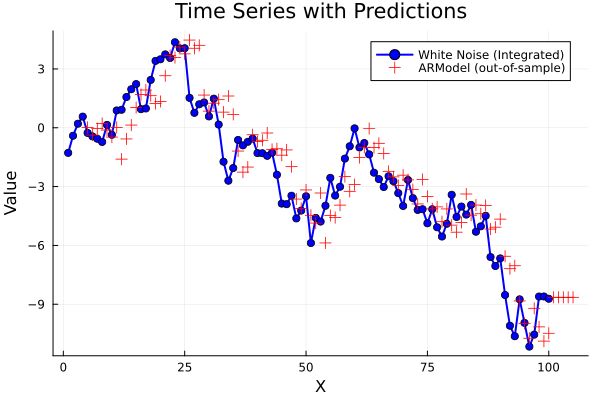

In [192]:
ar = ARModel(p=3)

white = integrate(WhiteNoise(100))

predictions = iterative_predict(ar, white, 5)
println(white)
println("RMSE: $(rmse(white, predictions))")
plot_timeseries(white, predictions)

# ARIMA Model Test

ARIMA(2,1,2) fitted successfully
Parameters: Dict{Symbol, Any}(:original_values => [0.5700842054568962, 2.2472514524871894, 4.730191945084788, 6.70119517427326, 8.137578549674505, 10.588713797960118, 14.233675360207766, 18.61651235520496, 22.3623200215402, 26.15697042300403, 31.077769784709485, 33.392707381504366, 32.835119557755796, 32.583003313169144, 31.2946829306019, 30.280028362427068, 30.985187533402293, 32.589837845727054, 35.05677283584407, 38.931257979189105, 42.389066840711415, 44.98453104612642, 47.03128391588415, 49.243815952025905, 50.62291309784693, 52.589529844117735, 54.75303474961053, 56.46631321313644, 57.24328806575991, 58.45172440730601, 60.808778536625546, 63.28489256147335, 65.99828137346117, 66.56577078165512, 67.01164211052993, 66.61405921162346, 64.85274731726616, 63.78708079365009, 63.07167825273085, 62.21680570065809, 60.85819343297843, 60.90308265591837, 62.9061493457159, 66.62904566820602, 68.50550925705213, 68.97003382777747, 67.44907858235813, 64.93196393

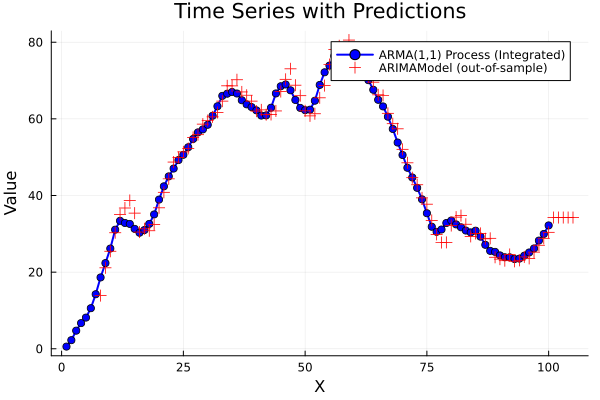

In [193]:
arma_ts = ARMAProcess(100; phi=[0.7], theta=[0.5])
arima_ts = integrate(arma_ts)
plot_ts(arima_ts)

# Create ARIMA(1,1,1) model - will difference once, then fit AR(1) and MA(1)
p, d, q = 2, 1, 2
arima = ARIMAModel(p=p, d=d,  q=q)

# Fit and predict
fit(arima, arima_ts)
predictions = forecast(arima, arima_ts, 10)

println("ARIMA($p,$d,$q) fitted successfully")
println("Parameters: $(get_parameters(arima))")
println("Forecast values: $(predictions.values)")

predictions = iterative_predict(arima, arima_ts, 5)
plot_timeseries(arima_ts, predictions)